# Explore BAM! Dataset and Models

I want to do the following:

1. Find the class distribution.
2. Load some suggero examples.
3. Run the latest BAM! Model from results on them and see if predictions match.

In [1]:
from osTools import *
from listOps import *
from PIL import Image
from more_itertools import *
import sys
import h5py
import matplotlib.pyplot as plt
import numpy as np

BAM_H5 = '/misc/extra/data/sumitc/bam.h5'
BAM_DIR = '/misc/extra/data/sumitc/bam'

classNames = list(map(getBaseName, listdir(BAM_DIR)))

with h5py.File(BAM_H5, 'r') as hf : 
    labels = hf.get('labels')[()]
print('BAM! Dataset Size -', labels.shape[0])
print(classNames)

BAM! Dataset Size - 1272581
['content_bicycle', 'content_bird', 'content_building', 'content_cars', 'content_cat', 'content_dog', 'content_flower', 'content_people', 'content_tree', 'emotion_gloomy', 'emotion_happy', 'emotion_peaceful', 'emotion_scary', 'media_3d_graphics', 'media_comic', 'media_graphite', 'media_oilpaint', 'media_pen_ink', 'media_vectorart', 'media_watercolor']


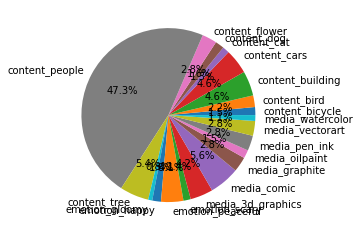

In [2]:
hist, _ = np.histogram(labels, bins=len(classNames))
plt.pie(hist, labels=classNames, autopct='%1.1f%%')
plt.show()

In [3]:
from TripletDataset import *

SUGGERO_DIR = '/misc/extra/data/sumitc/suggero/train'

dataset = TripletSVGDataSet(SUGGERO_DIR)
print('Suggero Dataset -', len(dataset.svgDatas))

100%|██████████| 14046/14046 [00:07<00:00, 1835.56it/s]

Suggero Dataset - 14046


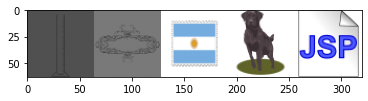

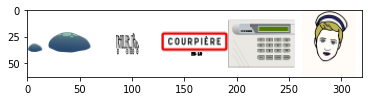

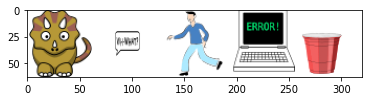

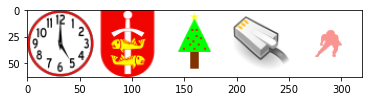

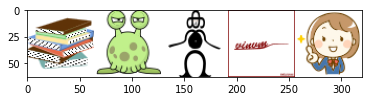

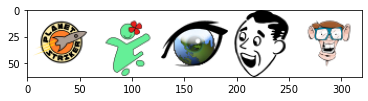

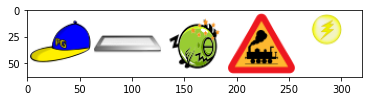

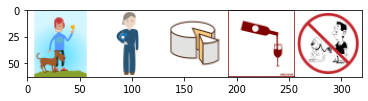

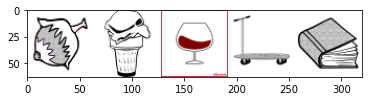

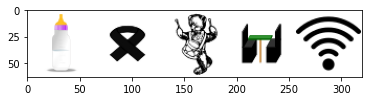

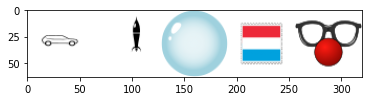

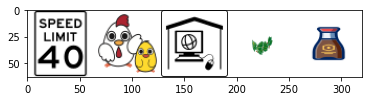

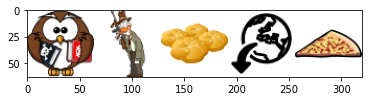

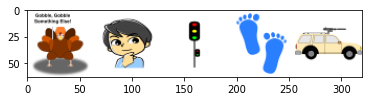

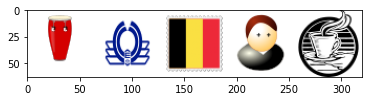

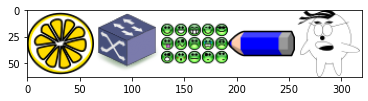

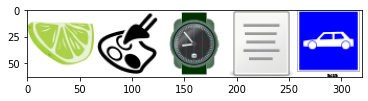

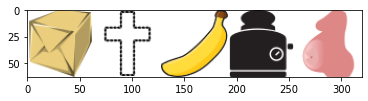

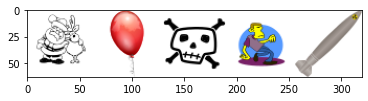

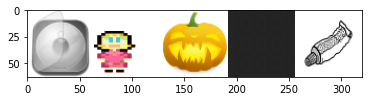

In [4]:
import random
from treeOps import *
import albumentations as A
from albumentations.pytorch import ToTensorV2

dataPts = list(zip(dataset.svgDatas, dataset.files))
samples = random.sample(dataPts, k=100)
imgs = [] 
testTransform = A.Compose([
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=1),
    ToTensorV2(),
])
for t, f in samples: 
    r = findRoot(t)
    im = np.array(dataset.loadImage(f, 'whole', r))
    imgs.append(im)
    
for i in range(20) : 
    plt.imshow(np.concatenate(imgs[5 * i: 5 * (i + 1)], axis=1))
    plt.show()

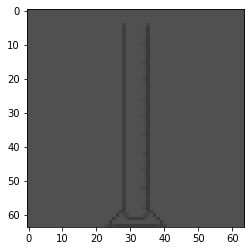

content_tree
emotion_gloomy
media_graphite
emotion_scary
content_flower


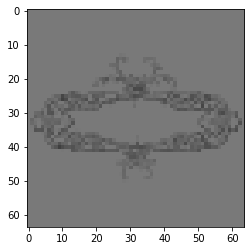

media_graphite
content_tree
content_flower
media_watercolor
emotion_gloomy


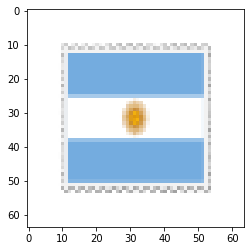

content_dog
content_bird
content_tree
emotion_peaceful
media_vectorart


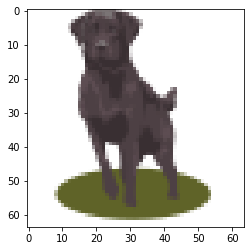

content_cat
content_dog
media_watercolor
emotion_scary
emotion_gloomy


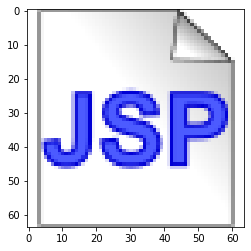

content_people
media_vectorart
content_cat
media_graphite
content_building


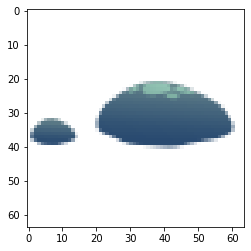

content_tree
emotion_peaceful
emotion_gloomy
content_dog
media_vectorart


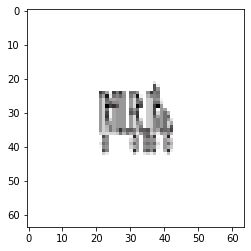

content_tree
content_flower
media_graphite
media_watercolor
content_bicycle


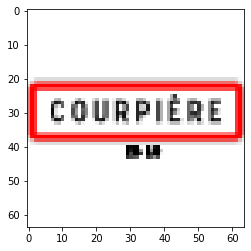

content_bird
emotion_gloomy
content_people
content_tree
emotion_peaceful


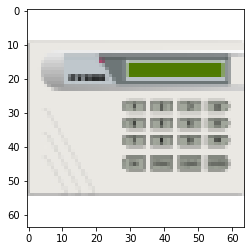

content_building
content_people
media_graphite
content_tree
content_flower


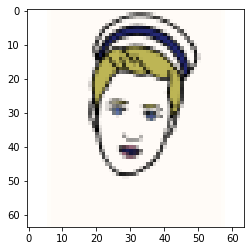

content_people
content_flower
content_tree
emotion_gloomy
media_watercolor


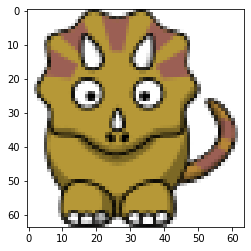

media_comic
content_flower
emotion_scary
content_cat
emotion_happy


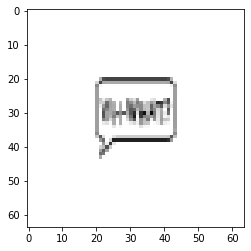

media_graphite
content_tree
content_dog
content_flower
emotion_gloomy


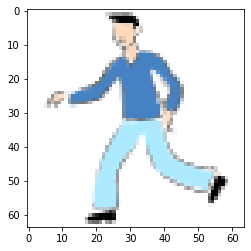

content_people
media_watercolor
content_bird
content_cat
content_dog


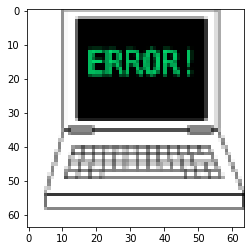

media_vectorart
content_people
content_bicycle
content_bird
content_cat


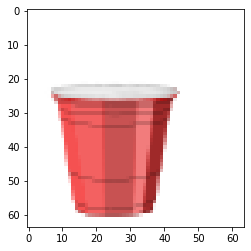

emotion_peaceful
emotion_gloomy
media_graphite
media_3d_graphics
content_tree


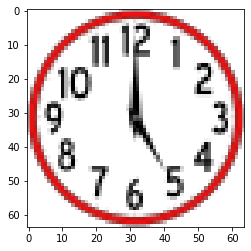

content_dog
content_people
media_watercolor
content_flower
content_bird


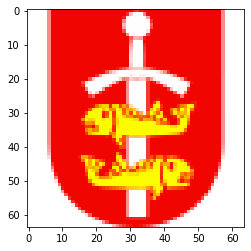

content_people
content_flower
emotion_happy
media_vectorart
content_cat


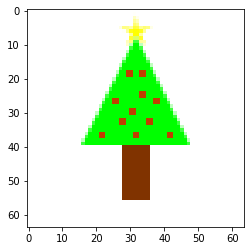

media_vectorart
content_people
content_flower
content_bird
content_tree


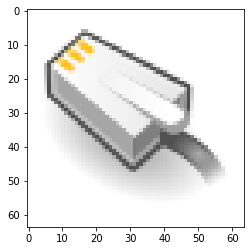

media_graphite
media_3d_graphics
content_bird
content_people
content_dog


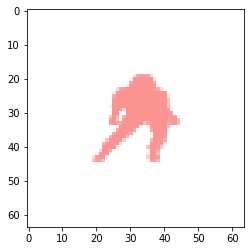

emotion_gloomy
content_dog
content_tree
content_people
media_watercolor


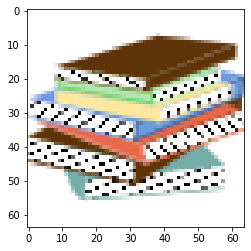

content_people
content_building
content_tree
media_vectorart
content_dog


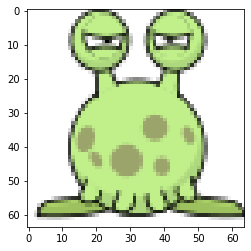

media_comic
content_bird
media_watercolor
content_cat
media_graphite


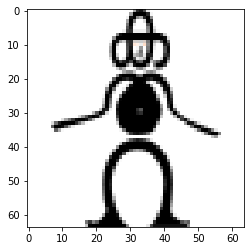

media_vectorart
content_flower
content_tree
content_bicycle
content_people


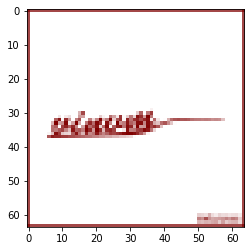

content_flower
content_tree
media_graphite
media_watercolor
emotion_gloomy


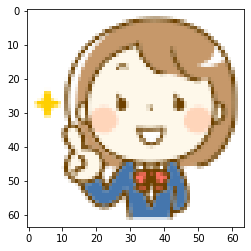

emotion_happy
media_comic
content_cat
content_flower
content_dog


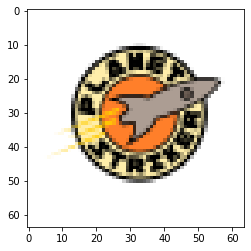

media_oilpaint
content_cat
content_bird
content_flower
emotion_happy


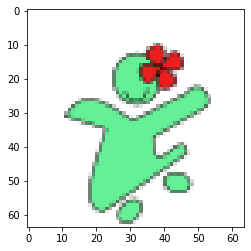

emotion_happy
content_flower
content_cat
emotion_scary
content_bird


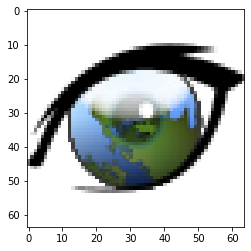

content_bird
content_people
content_tree
content_building
media_comic


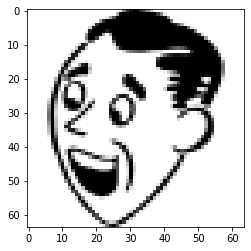

content_people
content_flower
emotion_scary
content_dog
content_bird


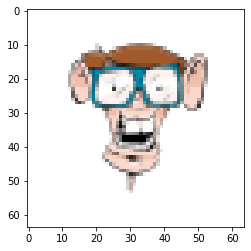

emotion_scary
media_comic
content_cat
content_tree
content_people


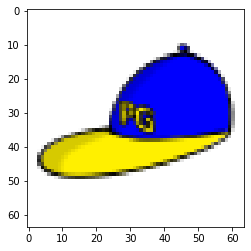

content_cat
media_watercolor
emotion_gloomy
content_people
content_bird


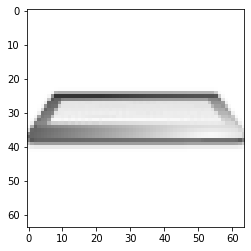

content_building
media_graphite
content_tree
content_people
emotion_gloomy


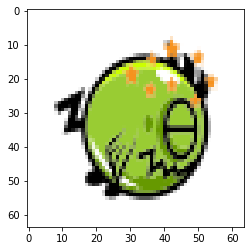

emotion_happy
emotion_scary
media_comic
content_tree
content_bird


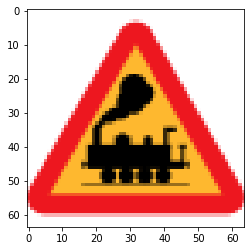

content_people
media_vectorart
content_tree
content_bird
content_building


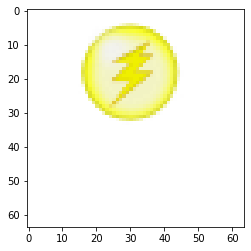

media_vectorart
content_flower
content_people
content_tree
content_dog


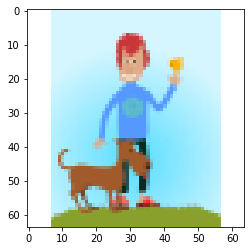

content_cat
content_dog
media_watercolor
content_tree
content_people


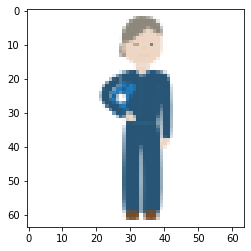

content_people
media_watercolor
content_tree
content_bird
emotion_gloomy


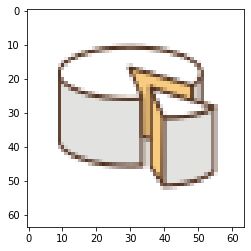

content_people
emotion_gloomy
content_flower
media_graphite
content_dog


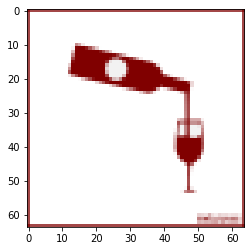

emotion_gloomy
content_tree
media_graphite
content_building
media_oilpaint


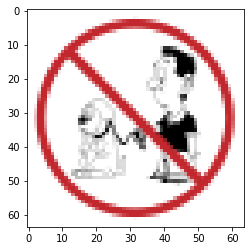

content_flower
content_people
media_watercolor
content_dog
content_cat


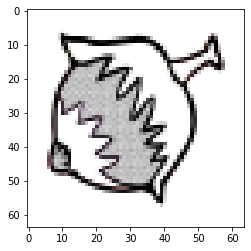

content_cat
content_bird
content_dog
content_tree
content_flower


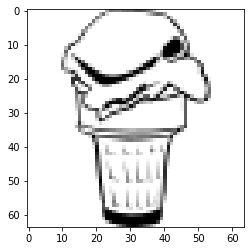

media_graphite
emotion_gloomy
content_tree
media_pen_ink
content_cat


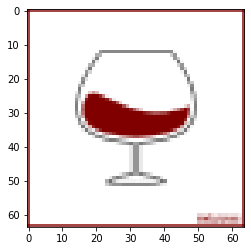

content_tree
content_flower
emotion_gloomy
media_watercolor
content_dog


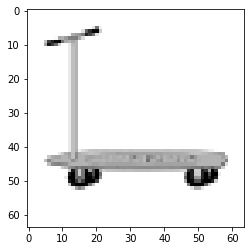

content_tree
media_graphite
emotion_gloomy
media_pen_ink
media_watercolor


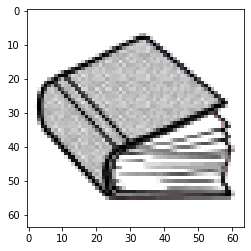

media_pen_ink
media_graphite
content_dog
media_watercolor
content_people


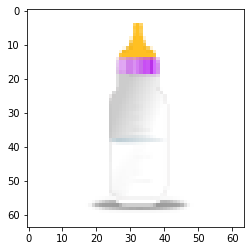

content_flower
media_watercolor
emotion_peaceful
content_people
media_graphite


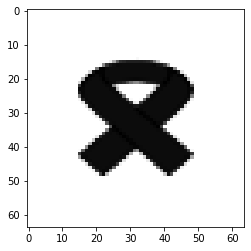

emotion_gloomy
content_tree
content_bird
media_vectorart
media_watercolor


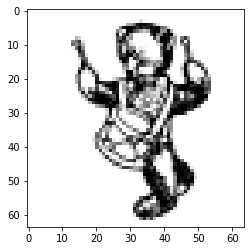

content_people
content_tree
content_dog
content_cat
content_flower


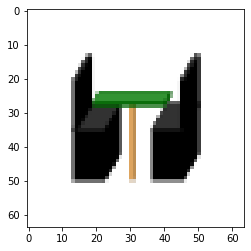

content_bird
content_flower
emotion_gloomy
media_vectorart
emotion_peaceful


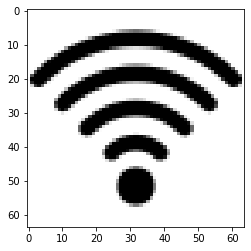

emotion_gloomy
media_vectorart
content_building
content_flower
content_tree


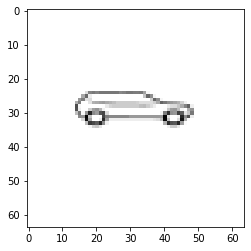

media_graphite
content_cars
content_tree
content_bird
media_watercolor


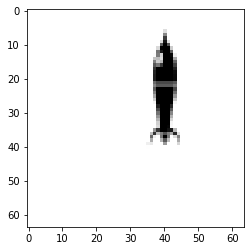

content_tree
media_graphite
emotion_gloomy
media_watercolor
content_cat


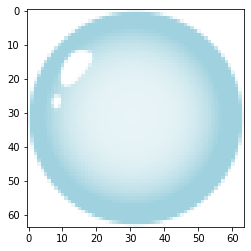

emotion_peaceful
media_vectorart
emotion_gloomy
content_flower
media_3d_graphics


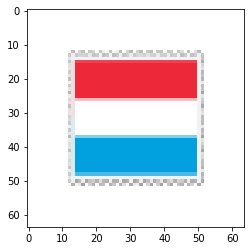

media_vectorart
content_flower
emotion_peaceful
emotion_gloomy
content_dog


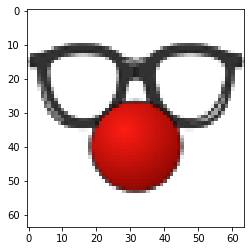

content_tree
media_vectorart
content_bird
content_bicycle
media_graphite


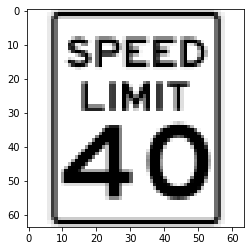

content_people
content_bird
media_vectorart
content_cat
content_building


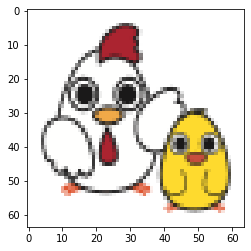

content_bird
content_cat
emotion_happy
media_watercolor
content_flower


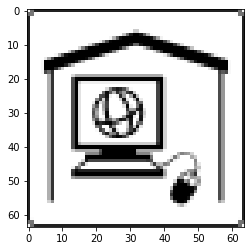

content_tree
media_watercolor
emotion_gloomy
content_bird
content_dog


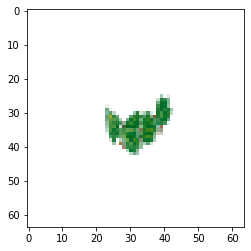

content_tree
emotion_peaceful
media_watercolor
content_cat
emotion_gloomy


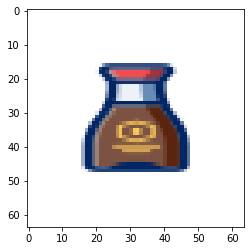

content_bird
content_people
content_flower
media_oilpaint
media_watercolor


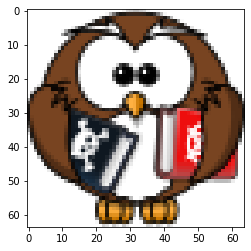

emotion_scary
content_bird
content_flower
content_cat
media_comic


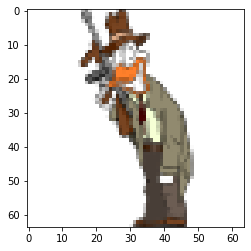

content_tree
media_watercolor
emotion_gloomy
emotion_scary
media_oilpaint


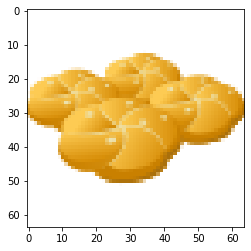

media_watercolor
emotion_happy
content_flower
content_bird
content_tree


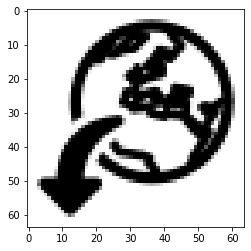

content_dog
emotion_gloomy
content_people
content_cat
content_tree


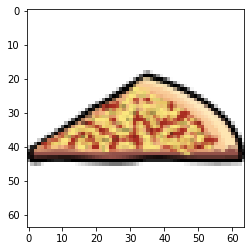

emotion_peaceful
media_graphite
content_building
media_watercolor
content_tree


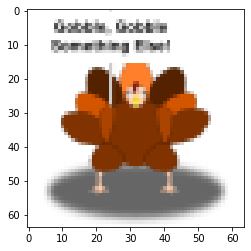

content_bird
content_cat
content_dog
content_flower
media_comic


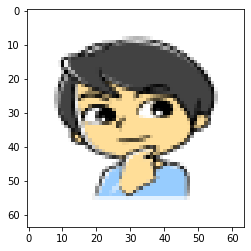

media_comic
content_tree
content_cat
emotion_scary
emotion_happy


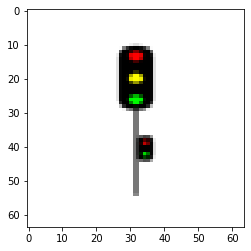

emotion_gloomy
content_people
media_graphite
content_tree
content_bird


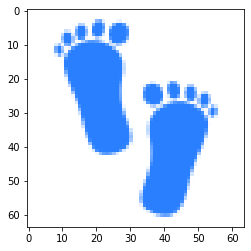

content_dog
content_bird
content_tree
content_cat
media_watercolor


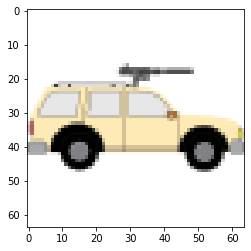

content_cars
content_people
content_dog
media_graphite
media_vectorart


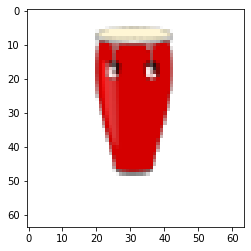

content_people
content_dog
content_flower
emotion_gloomy
emotion_scary


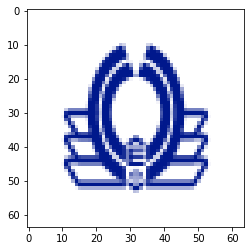

media_vectorart
content_bird
content_dog
content_cat
content_people


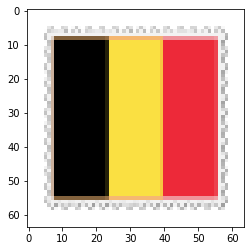

media_oilpaint
content_flower
content_tree
emotion_gloomy
content_people


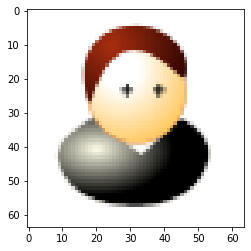

emotion_happy
content_bird
media_vectorart
content_people
content_tree


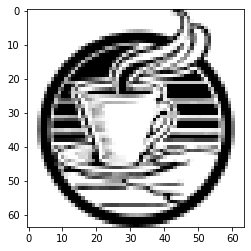

media_pen_ink
content_cat
content_flower
emotion_peaceful
emotion_gloomy


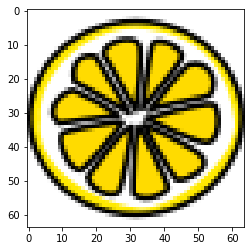

content_flower
media_vectorart
media_oilpaint
emotion_happy
content_cat


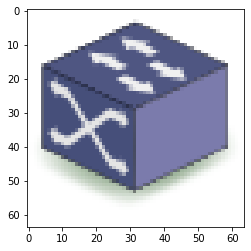

content_building
content_dog
content_flower
content_people
content_tree


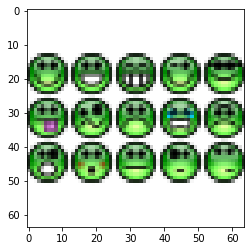

content_bicycle
content_flower
media_vectorart
content_people
content_dog


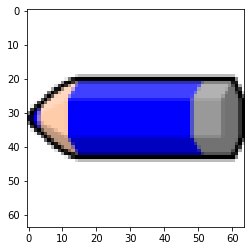

media_3d_graphics
media_vectorart
media_graphite
content_people
content_cat


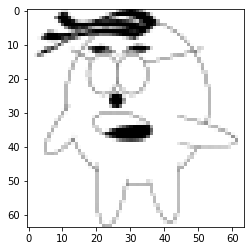

media_graphite
media_pen_ink
emotion_gloomy
media_watercolor
content_tree


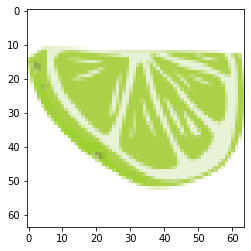

media_vectorart
emotion_peaceful
content_building
content_tree
media_graphite


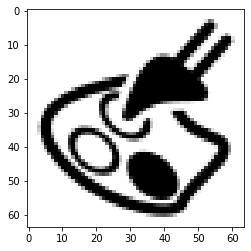

emotion_peaceful
content_bicycle
media_vectorart
media_watercolor
content_bird


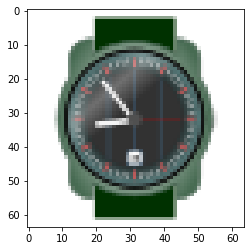

content_dog
content_people
content_bird
media_vectorart
content_bicycle


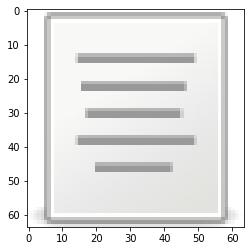

media_vectorart
content_building
media_oilpaint
content_flower
content_tree


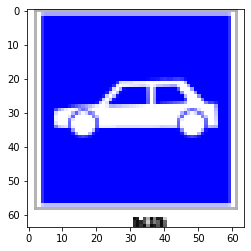

content_cars
content_building
content_flower
content_tree
content_dog


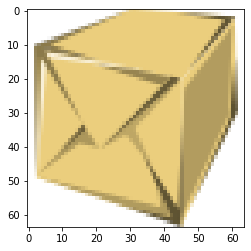

media_vectorart
media_graphite
content_building
content_dog
content_bird


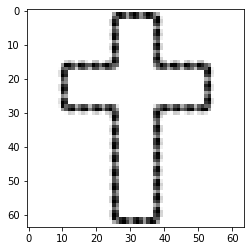

content_flower
content_tree
emotion_gloomy
content_people
emotion_scary


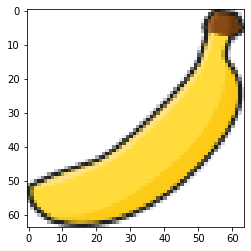

media_graphite
content_people
media_oilpaint
media_watercolor
content_bird


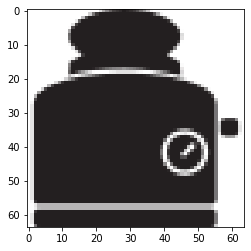

content_bird
content_cat
emotion_gloomy
content_bicycle
media_vectorart


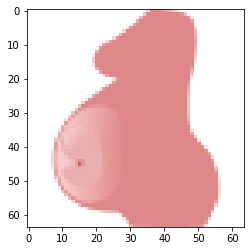

media_watercolor
content_flower
emotion_gloomy
media_graphite
content_bird


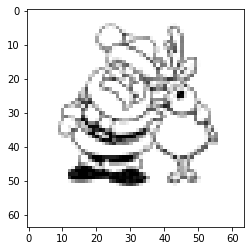

content_cat
content_flower
content_tree
emotion_happy
media_graphite


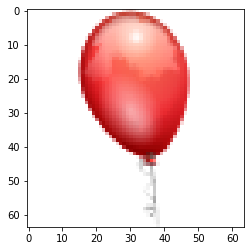

emotion_peaceful
emotion_happy
content_tree
content_flower
media_watercolor


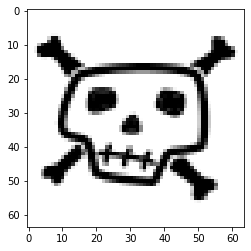

content_cat
emotion_scary
media_graphite
content_tree
emotion_happy


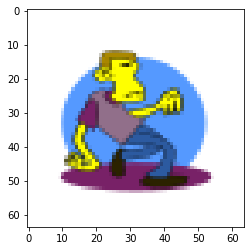

emotion_happy
media_comic
emotion_scary
content_flower
content_bird


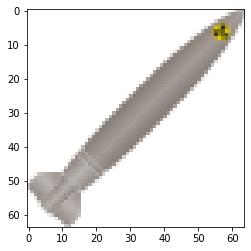

content_bird
media_graphite
media_watercolor
content_people
content_building


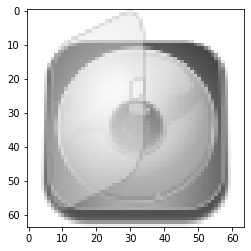

media_graphite
emotion_peaceful
content_bird
media_watercolor
content_tree


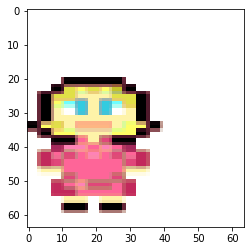

media_watercolor
content_tree
media_oilpaint
content_flower
content_building


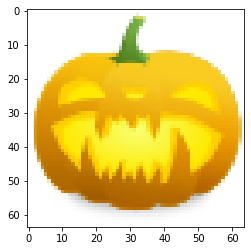

media_oilpaint
content_bird
emotion_peaceful
emotion_happy
media_watercolor


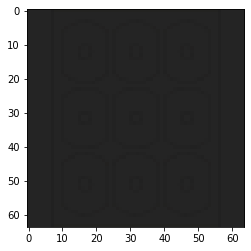

emotion_gloomy
content_tree
media_graphite
content_building
emotion_scary


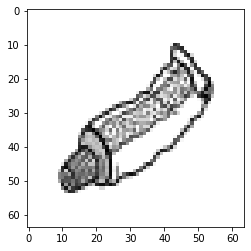

media_graphite
media_pen_ink
content_dog
emotion_peaceful
content_flower


In [5]:
# Load Model And Test
from torchvision.models import *
import torch
import torch.nn as nn

BASE_DIR = os.path.dirname(os.path.abspath(''))
MODEL_DIR = os.path.join(BASE_DIR, 'vectorrvnn', 'results', 'bam_aug2')
model = resnet50(pretrained=True)
model.fc = nn.Linear(2048, 20)
state_dict = torch.load(os.path.join(MODEL_DIR, "epoch_15.pth"))
model.load_state_dict(state_dict['model'])
model = model.float()
model.to("cuda")
model.eval()

modelInput = torch.stack([testTransform(image=im)['image'] for im in imgs]).cuda()
with torch.no_grad() : 
    scores = model(modelInput)
probabilities = torch.nn.functional.softmax(scores, dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5, dim=1)

for i, im in enumerate(imgs) : 
    plt.imshow(im)
    plt.show()
    for j in range(5) : 
        print(classNames[top5_catid[i][j]])


## Test elements of the Triplet Network

In [6]:
import json
from Triplet import *

with open('./commonConfig.json') as fd : 
        config = json.load(fd)
valData = TripletSVGDataSet(osp.join(config['suggero_dest'], 'val'))
val_dataloader = torch.utils.data.DataLoader(
    valData, 
    batch_size=128, 
    sampler=TripletSampler(valData.svgDatas, 25600, True),
    pin_memory=True,
    num_workers=6,
    collate_fn=lambda x : aggregateDict(x, torch.stack)
)
# Initiate main model.
model = TripletNet(dict(hidden_size=100)).float()

100%|██████████| 3510/3510 [00:01<00:00, 1840.68it/s]


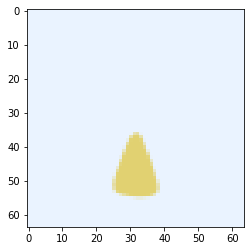

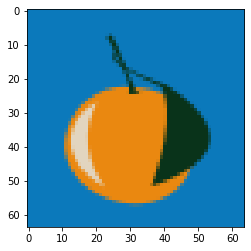

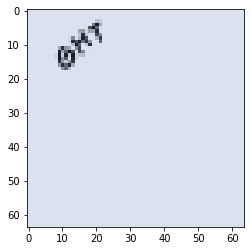

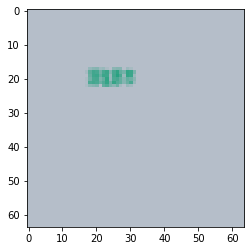

Norms - 717.4910278320312 585.3739013671875


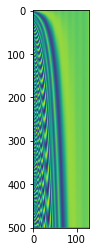

In [14]:
from PositionalEncoding import *

for batch in val_dataloader : 
    break

pe = PositionalEncoding()
pe.to("cuda")
nodeWhole = batch['refWhole'].cuda()
positions = batch['refPositions'].cuda()
vis = (nodeWhole - nodeWhole.min()) / (nodeWhole.max() - nodeWhole.min())
vis = vis.permute((0, 2, 3, 1)).detach().cpu().numpy()
# Checking Input
for i in range(0, vis.shape[0], 32) : 
    plt.imshow(vis[i])
    plt.show()

x = model.conv(nodeWhole)
x_ = pe(x, positions)

print('Norms -', torch.linalg.norm(x_ - x).item(), torch.linalg.norm(x).item())

encoding = pe.pe.squeeze().detach().cpu().numpy()
plt.imshow(encoding)
plt.show()